<a href="https://colab.research.google.com/github/sans1012/Mileage-Prediction/blob/main/Mileage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predictive analysis

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [4]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [7]:
df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## from mean we get that the scale is not same for all columns. Therefore we need to perform standardisation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
#replacing the null value with its column median
df['horsepower']=df['horsepower'].replace(np.NaN, df['horsepower'].median())

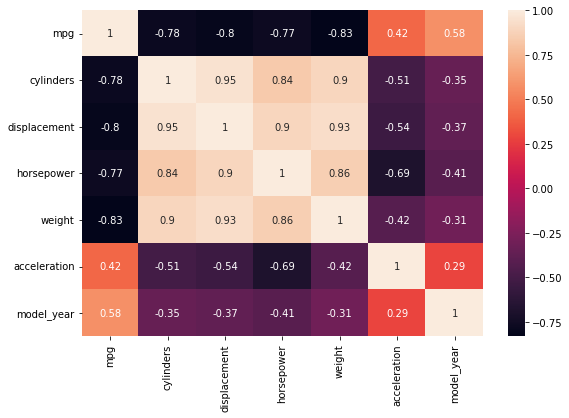

In [16]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True)

1. High correlation between: 
  Dispalcement, Horsepower, Weight with mpg/mileage(target value)

2. Cylinder and Displacement are 95% correlated-> High correlation

  Therefore we need to drop one of them else there will be multicolinearity.
  Also,
      
        Displacement= No. of Cylinders X Volumne of cylinder
    Therefore dropping cylinder as displacement is continuous value
3. Weak correlation between accelaration and mileage

In [18]:
df.drop(['cylinders'], axis=1, inplace=True)

In [20]:
df.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'name'],
      dtype='object')

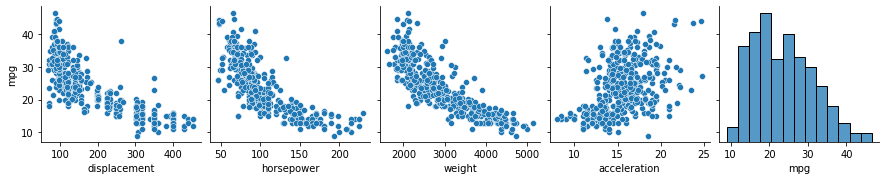

In [22]:
sns.pairplot(df, x_vars=['displacement', 'horsepower','weight', 'acceleration', 'mpg'], y_vars=['mpg'])

1. Large Horsepower-> low mileage
2. Increase in weight of vehicle is decreasing the mileage

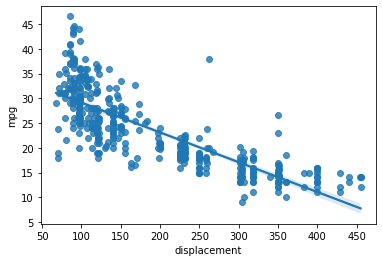

In [24]:
sns.regplot(x='displacement', y='mpg', data=df)

In [29]:
X=df.drop(['model_year', 'origin', 'name','mpg'], axis=1)

In [26]:
y=df['mpg']

# Standard Scaling

In [31]:

from sklearn.preprocessing import StandardScaler

In [32]:
ss=StandardScaler()

In [33]:
X=ss.fit_transform(X)

In [35]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-8.312725e-17,1.458911e-16,-9.902743e-17,8.982206e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.204411e+00,-1.527300e+00,-1.604943e+00,-2.747814e+00
25%,-8.563178e-01,-7.414364e-01,-8.828266e-01,-6.328794e-01
50%,-4.314040e-01,-2.830161e-01,-1.973624e-01,-2.472221e-02
75%,6.584879e-01,5.421404e-01,7.538337e-01,5.834349e-01
max,2.511784e+00,3.292662e+00,2.565185e+00,3.351912e+00


All the columns now have mean around 0 and std around 1

# Train Test split

In [36]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((278, 4), (120, 4), (278,), (120,))

# Linear Regression model

In [39]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
lr.intercept_

23.552965669444223

In [46]:
lr.coef_

array([-1.27867045, -1.2657007 , -4.39261091,  0.11375975])

1. Displacement:-1.27867045  : A unit increase in displacement will decrease mileage by 1.27 units
2. Horsepower: -1.2657007 
3. Weight: -4.39261091 
4. Acceleration: 0.11375975

** Regression Equation **

> Indented block



Mileage= 24.55+ Displacement*-1.27867045+ Horsepower* -1.2657007 +  Weight* -4.39261091  + Acceleration* 0.11375975

In [49]:
y_pred= lr.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [50]:
mean_absolute_percentage_error(y_test, y_pred)

0.1490941390984645

In [51]:
mean_absolute_error(y_test, y_pred)

3.263066462922187

In [67]:
r2_score(y_test, y_pred)

0.720405159880765

# Prediction


In [58]:
y_input=[[3, 1.2, 2.3,2]]
y_input_scaled= ss.fit_transform(y_input)
y_pred_input=lr.predict(y_input)
y_pred_input

array([8.32262788])

# Polynomial Regression

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly=PolynomialFeatures(degree=2, interaction_only=True,)

In [70]:
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(poly_X_train, y_train)


LinearRegression()

In [75]:
poly_pred=model.predict(poly_X_test)

In [76]:
mean_absolute_percentage_error(y_test, poly_pred)

0.11436094888548272

In [77]:
mean_absolute_error(y_test, poly_pred)

2.703469651107275

In [78]:
r2_score(y_test, poly_pred)

0.7904952062547096

# Prediction

In [82]:
y_input=[[3, 1.2, 2.3,2]]
y_input_scaled= poly.fit_transform(y_input)
y_pred_input=model.predict(y_input_scaled)
y_pred_input

array([10.23558588])

# Lasso regression

In [83]:
from sklearn.linear_model import Lasso

In [84]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train, y_train)


Lasso(alpha=0.001)

In [85]:
lasso_pred=lasso.predict(X_test)

In [86]:
mean_absolute_percentage_error(y_test, lasso_pred)

0.1490715310932016

In [87]:
mean_absolute_error(y_test, lasso_pred)

3.2627884590084526

In [88]:
r2_score(y_test, lasso_pred)

0.7204436319583222

## Prediction


In [89]:
y_input=[[3, 1.2, 2.3,2]]
y_input_scaled= ss.fit_transform(y_input)
y_pred_input=lasso.predict(y_input_scaled)
y_pred_input

array([23.55294891])

# Ridge Regression

In [91]:
from sklearn.linear_model import Ridge

In [92]:
ridge=Ridge()

In [94]:
ridge.fit(X_train, y_train)

Ridge()

In [95]:
ridge_pred= ridge.predict(X_test)

In [96]:
mean_absolute_percentage_error(y_test, ridge_pred)

0.14906106490494833

In [97]:
mean_absolute_error(y_test, ridge_pred)

3.2634606309566676

In [98]:
r2_score(y_test, ridge_pred)

0.7203240044745489

## Prediction


In [99]:
y_input=[[3, 1.2, 2.3,2]]
y_input_scaled= ss.fit_transform(y_input)
y_pred_input=ridge.predict(y_input_scaled)
y_pred_input

array([23.55063509])

## The best model was Polymonial Regression with an accuray around 80%